# Task 1

Link to the datasets: https://drive.google.com/file/d/15MxHRAdwPXCENACwn8wLMkb98ZCjDeh6/view?usp=share_link

**Dataset_1** - The most basic API traffic containing the least number of attacks and endpoints. Will basically enable to have a soft start. 

```
Dataset 1 baseline score:

                   precision    recall  f1-score   support

    Benign          0.95715   0.93922   0.99792       480
    Malware         0.99799   0.94129   0.96881       528
    
    accuracy                            0.96825      1008
    macro avg       0.96860   0.96960   0.96824      1008
    weighted avg    0.97000   0.96825   0.96827      1008

```

# Cisco - Ariel University API Security Detection Challenge 2023
## Baseline code


### Imports and global settings

In [48]:
# Imports, settings and first dataset view
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer, recall_score

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier

import pickle

# from ipywidgets import widgets

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 1  # Options are [1, 2, 3, 4]
test_type = 'label'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,Directory Traversal,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,NaN,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,Cookie Injection,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,NaN,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,LOG4J,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [49]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method


def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,LOG4J,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=wKm-iDQeCXGjwXGrGJvfzWzs5VYbnWSP75B6BjFz1...,"Mon, 21 Nov 2022 18:39:51 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,/cookielogin,0,username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc...,Cookie Injection,Malware
4278,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=oyXTP1KfNdMwWb_jIYEQYKzE9RZALsuCGCtJtUlju...,"Mon, 21 Nov 2022 18:39:51 GMT",GET,http://127.0.0.1:5000/orders/get/id/7668,,404 NOT FOUND,application/json,36,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4279,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=bfYOeMnpxlFA9F7ObPemhCXYmeYNbBteewfAWbnfy...,"Mon, 21 Nov 2022 18:39:52 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIw

In [50]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   request.headers.Host             4282 non-null   object
 1   request.headers.User-Agent       4282 non-null   object
 2   request.headers.Accept-Encoding  4282 non-null   object
 3   request.headers.Accept           4282 non-null   object
 4   request.headers.Connection       4282 non-null   object
 5   request.headers.Accept-Language  4282 non-null   object
 6   request.headers.Sec-Fetch-Site   4282 non-null   object
 7   request.headers.Sec-Fetch-Mode   4282 non-null   object
 8   request.headers.Sec-Fetch-User   4282 non-null   object
 9   request.headers.Sec-Fetch-Dest   4282 non-null   object
 10  request.headers.Set-Cookie       4282 non-null   object
 11  request.headers.Date             4282 non-null   object
 12  request.method                   4

In [51]:
list_of_nan_for_more_than_90 = []
for col in df.columns:
    if df[col].isna().sum() / df.shape[0] * 100 > 90:
        list_of_nan_for_more_than_90.append(col)
        print(f"Column {col} has {df[col].isna().sum()} NaN values, which is {round(df[col].isna().sum() / df.shape[0] * 100, 2)}%, and has {df[col].nunique()} unique values")

Column response.headers.Location has 3881 NaN values, which is 90.64%, and has 2 unique values
Column request.headers.Content-Length has 3983 NaN values, which is 93.02%, and has 1 unique values
Column response.headers.Set-Cookie has 3983 NaN values, which is 93.02%, and has 1 unique values


In [52]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",None,None,None,None,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,None,None,None,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,LOG4J,Malware


In [53]:
# Detect columns that have the same value for all rows and print them
from collections import Counter
for column in df.columns:
    if len(Counter(df[column])) == 1:
        print(column)

request.headers.Host
request.headers.Accept
request.headers.Connection
request.headers.Sec-Fetch-User
request.body


In [54]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                  'request.headers.Host',
                  'request.method',
                  'request.headers.Accept-Language',
                  'request.headers.Sec-Fetch-Site',
                  'request.headers.Sec-Fetch-Mode',
                  'request.headers.Sec-Fetch-Dest',
                  'response.status',
                  ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                   'request.headers.Set-Cookie',
                   'request.headers.Date',
                   'request.url',
                   'response.headers.Content-Type',
                   'response.body',
                   'response.headers.Location',
                   'request.headers.Content-Length',
                   'request.headers.Cookie',
                   'response.headers.Set-Cookie'
                   ]

COLUMNS_TO_REMOVE = ['request.body',
                     'response.headers.Content-Length',
                     'request.headers.Date',
                     'request.headers.Accept',
                     'request.headers.Connection',
                     'request.headers.Sec-Fetch-User',
                     ]

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models


def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS:
        df[column] = le.fit_transform(df[column])

    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS:
        # newHVec = h_vec.fit_transform(df[column])
        # df[column] = newHVec.todense()
        # Run LabelEncoder on the chosen features
        df[column] = le.fit_transform(df[column])
    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,0,27,0,1,0,0,0,3529,0,2372,0,0,200,187,0,1,1,0,Directory Traversal,Malware
1,0,30,0,0,0,0,0,2052,0,28,4,0,404,181,0,1,1,0,Benign,Benign
2,0,32,0,0,0,0,0,4083,0,240,0,1,200,14,22,1,1,0,Cookie Injection,Malware
3,0,20,0,1,0,0,0,3579,0,2327,4,0,404,302,0,1,1,0,Benign,Benign
4,0,18,0,0,0,0,29,3980,0,30,4,0,404,181,0,1,1,0,LOG4J,Malware


In [55]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   request.headers.Host             4282 non-null   int64 
 1   request.headers.User-Agent       4282 non-null   int64 
 2   request.headers.Accept-Encoding  4282 non-null   int64 
 3   request.headers.Accept-Language  4282 non-null   int64 
 4   request.headers.Sec-Fetch-Site   4282 non-null   int64 
 5   request.headers.Sec-Fetch-Mode   4282 non-null   int64 
 6   request.headers.Sec-Fetch-Dest   4282 non-null   int64 
 7   request.headers.Set-Cookie       4282 non-null   int64 
 8   request.method                   4282 non-null   int64 
 9   request.url                      4282 non-null   int64 
 10  response.status                  4282 non-null   int64 
 11  response.headers.Content-Type    4282 non-null   int64 
 12  response.status_code             4

In [56]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'request.headers.Cookie', 'response.headers.Location', 'request.headers.Content-Length', 'response.headers.Set-Cookie']


request.headers.Host                int64
request.headers.User-Agent          int64
request.headers.Accept-Encoding     int64
request.headers.Accept-Language     int64
request.headers.Sec-Fetch-Site      int64
request.headers.Sec-Fetch-Mode      int64
request.headers.Sec-Fetch-Dest      int64
request.headers.Set-Cookie          int64
request.method                      int64
request.url                         int64
response.status                     int64
response.headers.Content-Type       int64
response.status_code                int64
response.body                       int64
request.headers.Cookie              int64
response.headers.Location           int64
request.headers.Content-Length      int64
response.headers.Set-Cookie         int64
attack_type                        object
label                              object
dtype: object

# NOT SURE AREA

##### START

In [57]:
# # Feature selection
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# # Split the data to train and test
# X_train, X_test, y_train, y_test = train_test_split(df[features_list], df[test_type], test_size=0.2, random_state=42)

# # Create the RFE object and compute a cross-validated score.
# # The "accuracy" scoring is proportional to the number of correct classifications
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
# rfecv.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [58]:
# Data exploration
def plot_pie_chart(df, column_name):
    fig = px.pie(df, values=column_name, names=column_name)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [59]:
plot_pie_chart(df, 'label')

##### END

In [60]:
ss = StandardScaler()

In [61]:
pca = PCA(n_components=2)

In [62]:
# x_after_pca_in_2D=pca.fit_transform(df[features_list].to_numpy())
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

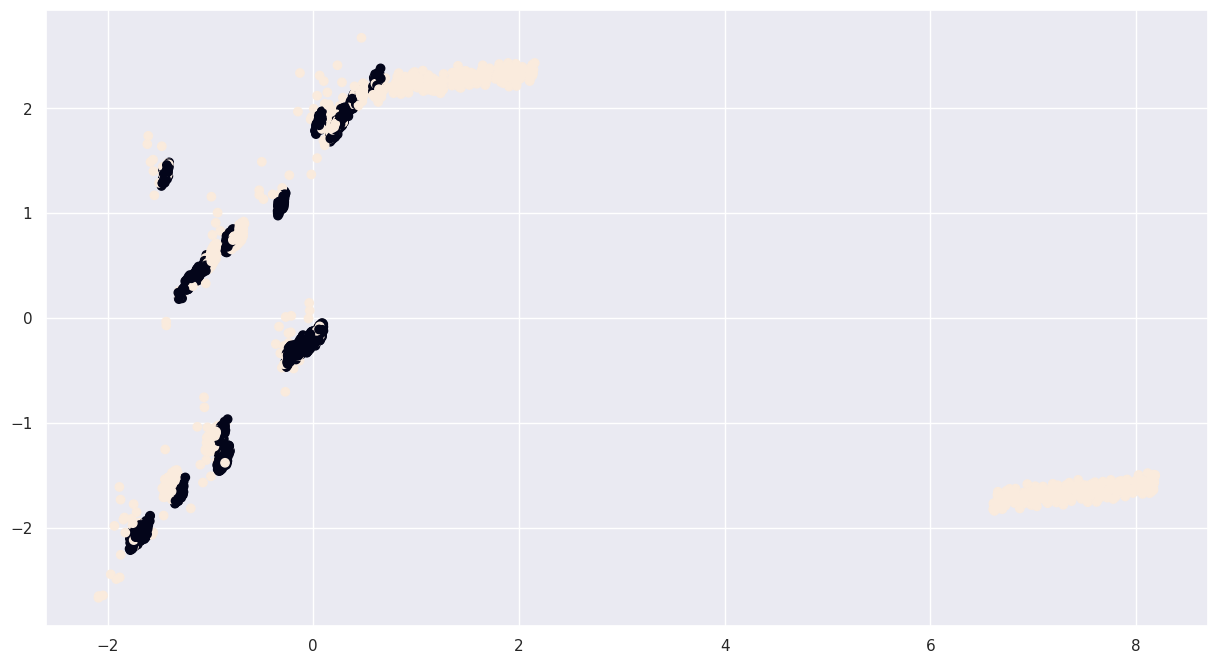

In [63]:
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df['label'].map({'Benign': 0, 'Malware': 1}))

In [64]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

As we can see we can compress the data into 14 components without loosing any information.

## Train test split

In [65]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list]#.to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(3526, 18) (3526,)
(756, 18) (756,)


Counter({'Malware': 2264, 'Benign': 2018})

In [66]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [67]:
pca = PCA(14)
pca.fit(X_train)
# x_train_pca = pca.transform(X_train)
x_train_pca_real = pca.transform(X_train)
x_train_pca = X_train

In [68]:
# x_test_pca = pca.transform(X_test)
x_test_pca_real = pca.transform(X_test)
x_test_pca = X_test

In [69]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.barh(range(x_train_pca.shape[1]), model.feature_importances_, align="center")
    plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
    plt.ylim([-1, x_train_pca.shape[1]])
    plt.show()

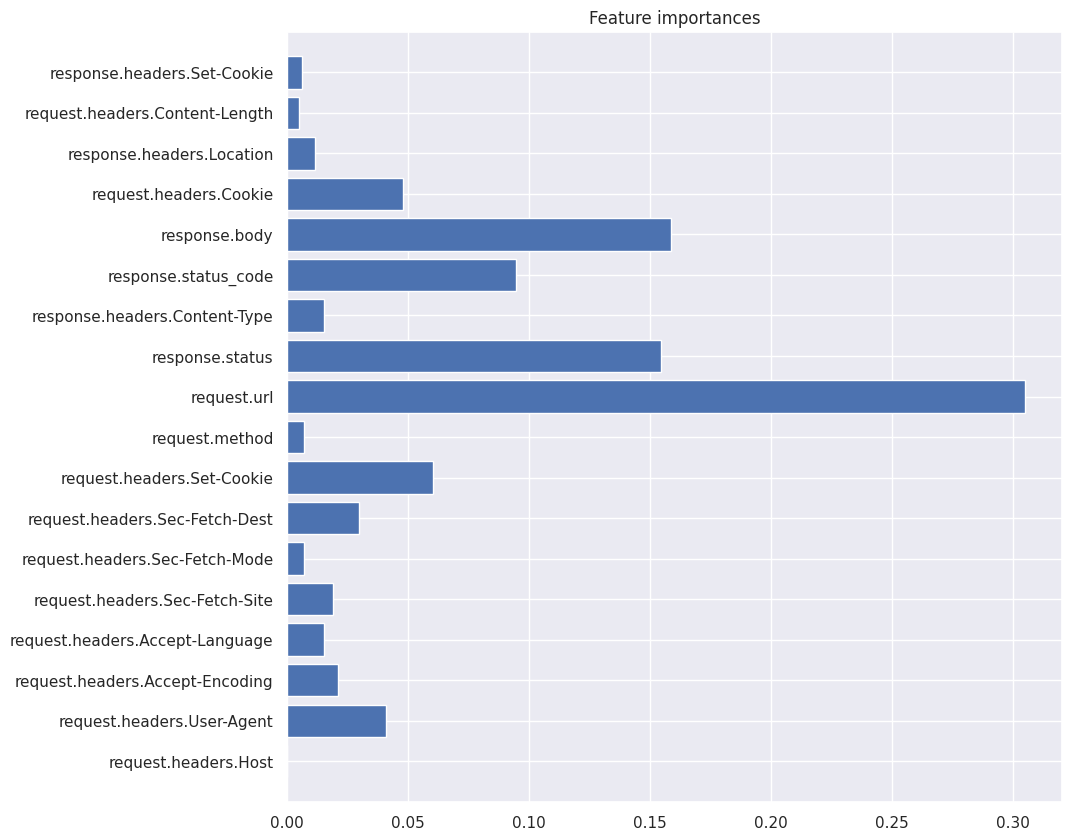

In [70]:
# Feature selection with Random Forest Classifier

rfc_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(rfc_fs)

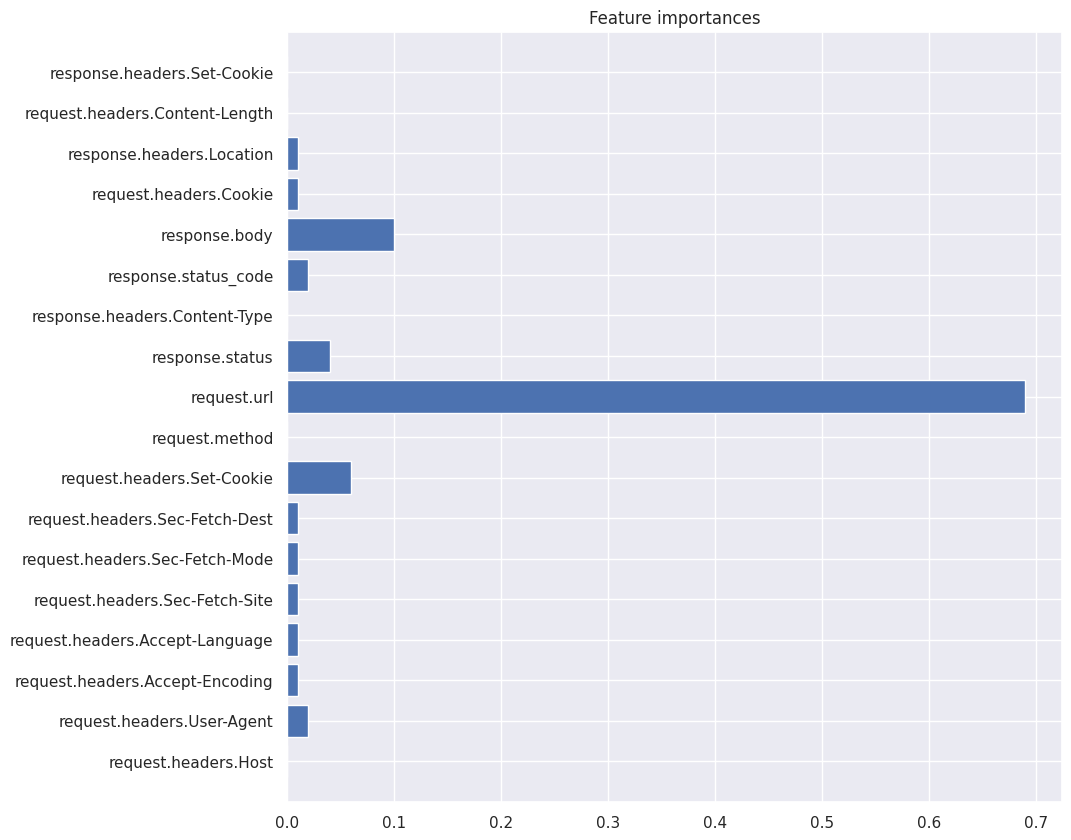

In [71]:
# Feature selection with AdaBoost Classifier

abc_fs = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(abc_fs)

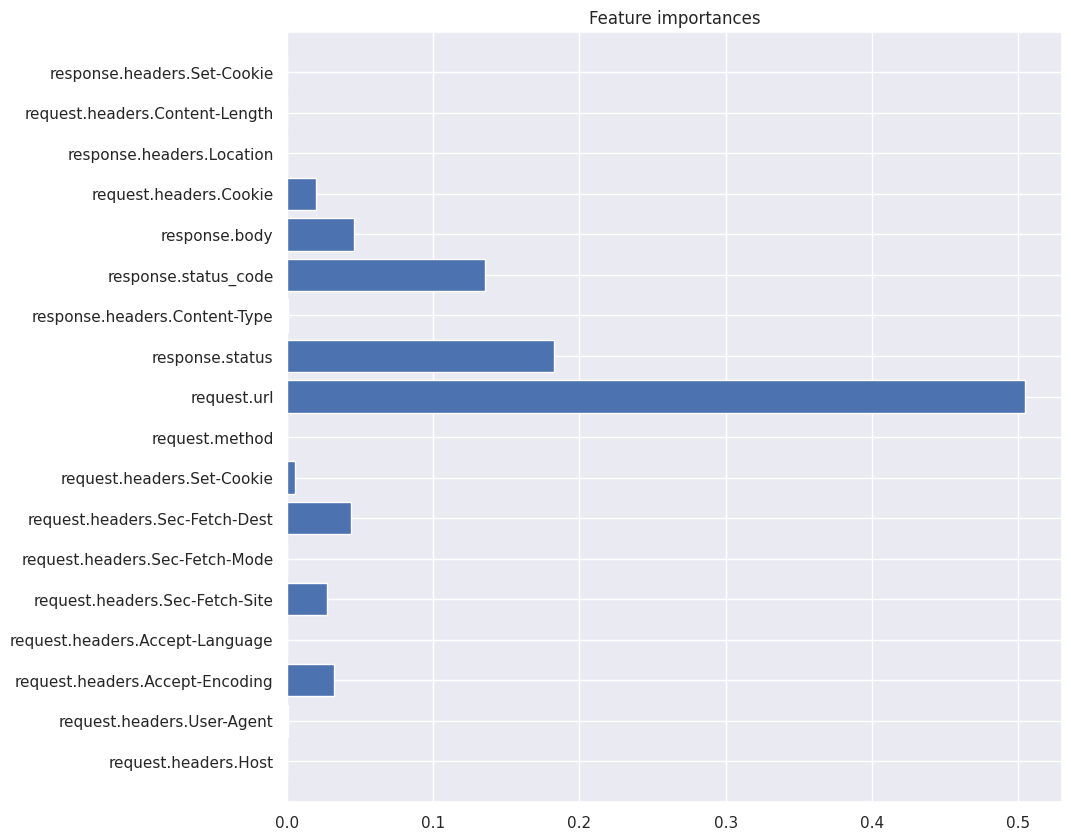

In [72]:
# Feature selection with Gradient Boosting Classifier

gbc_fs = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(gbc_fs)

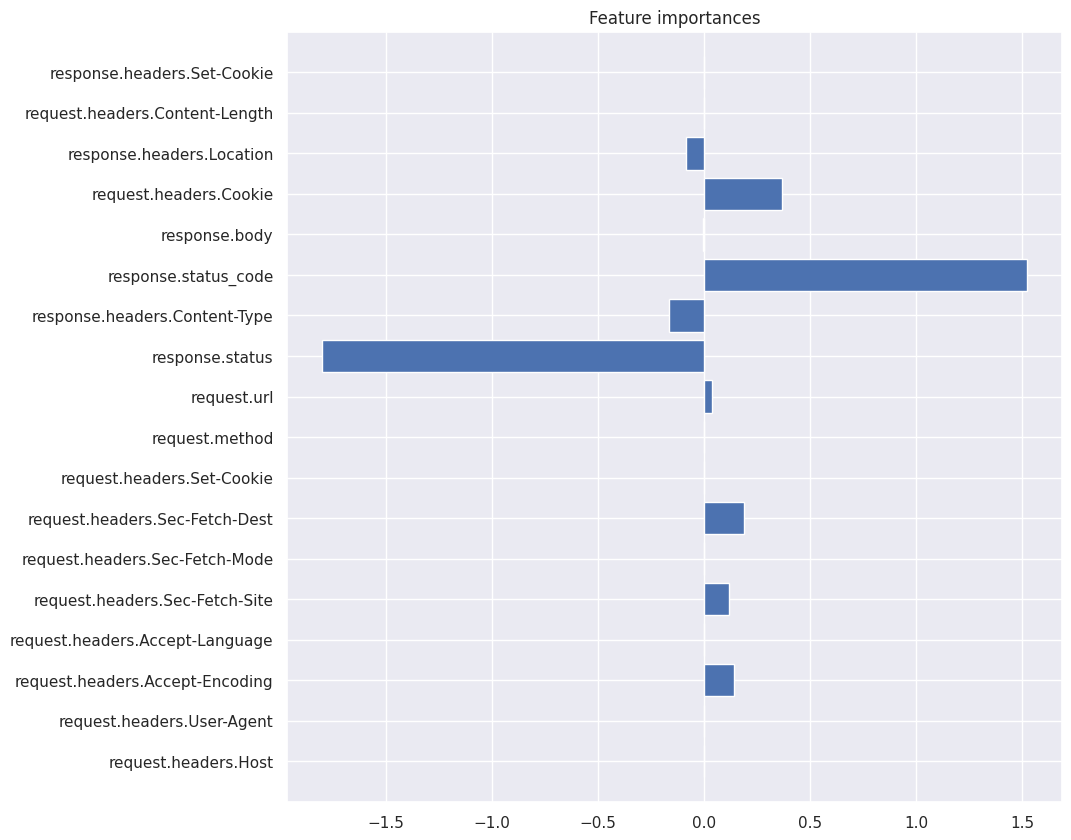

In [73]:
# Feature importance with Linear SVC
 
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train_pca, y_train)
lsvc.coef_

# Plot feature importance with Linear SVC
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(x_train_pca.shape[1]), lsvc.coef_[0], align="center")
plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
plt.ylim([-1, x_train_pca.shape[1]])
plt.show()


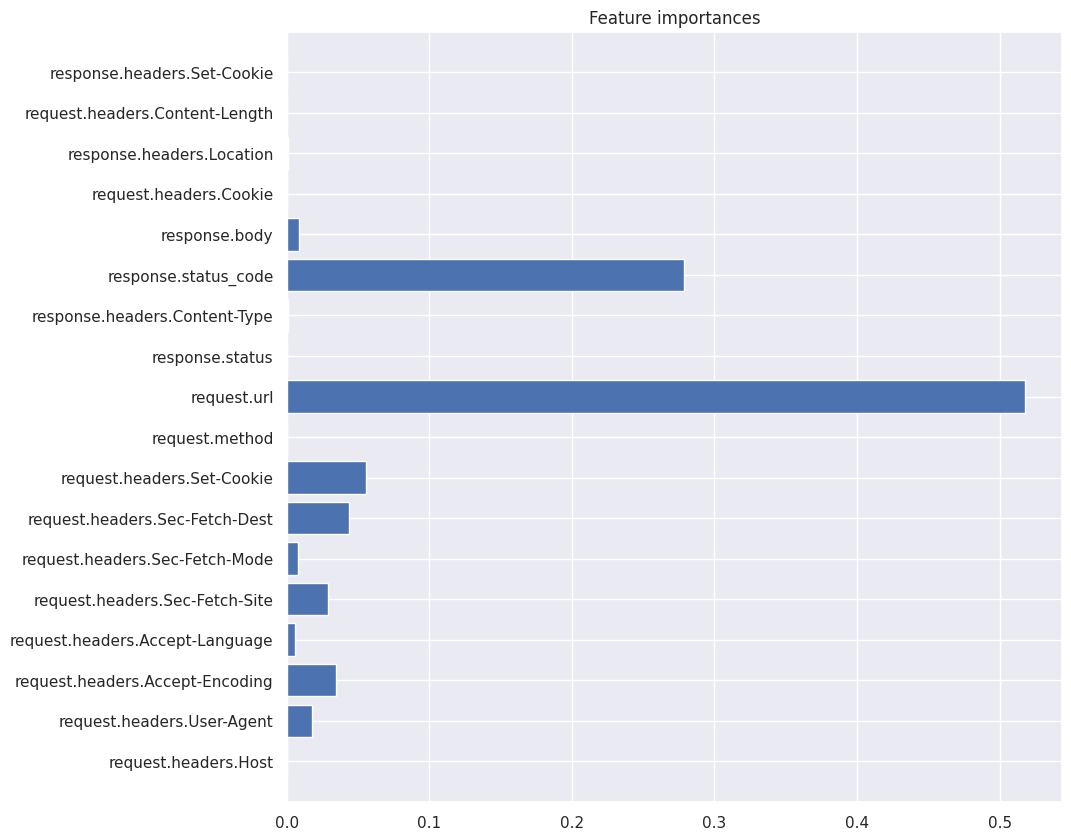

In [74]:
# Feature selection with Decision Tree Classifier

dtc_fs = DecisionTreeClassifier(random_state=42)
dtc_fs.fit(x_train_pca, y_train)

plot_feature_importance(dtc_fs)

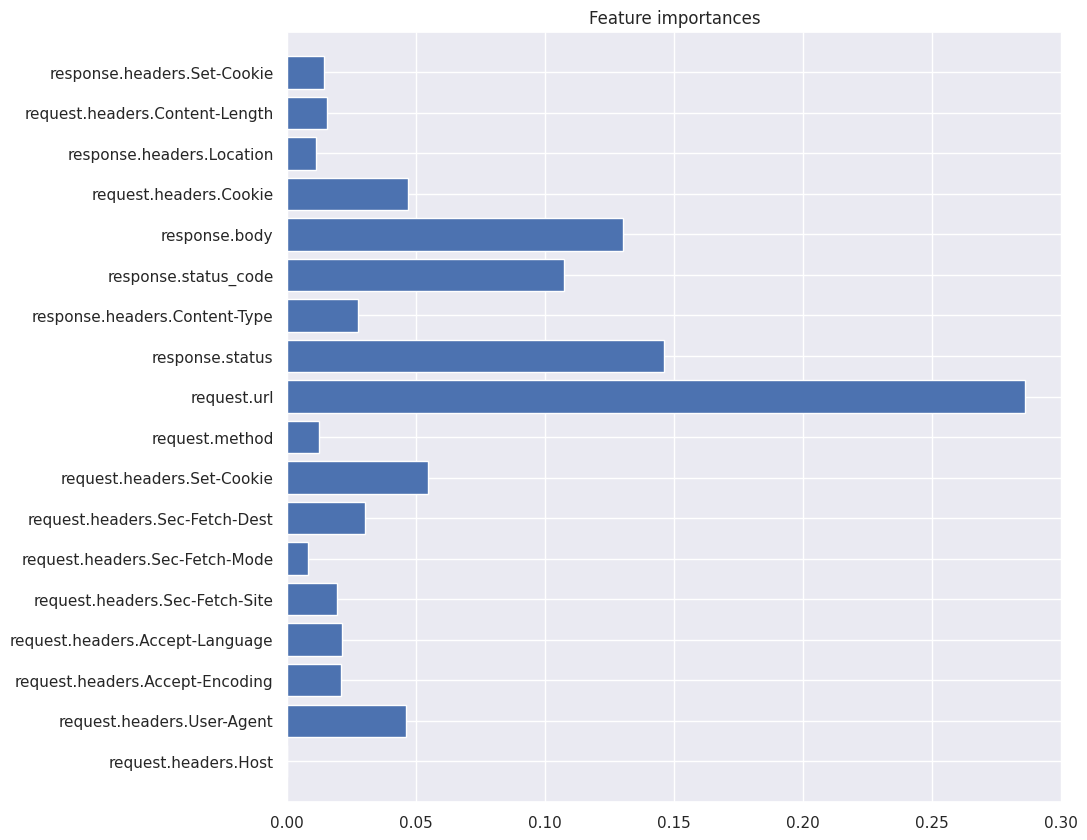

In [75]:
# Feature selection with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc_fs.fit(x_train_pca, y_train)

plot_feature_importance(etc_fs)

In [76]:
# Print the feature ranking - Top 10
fs_table = pd.DataFrame(columns=['Feature', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Linear SVC', 'Decision Tree', 'Extra Trees'])
fs_table['Feature'] = features_list
fs_table['Random Forest'] = rfc_fs.feature_importances_

fs_table['AdaBoost'] = abc_fs.feature_importances_
fs_table['Gradient Boosting'] = gbc_fs.feature_importances_
fs_table['Linear SVC'] = np.abs(lsvc.coef_[0])
fs_table['Decision Tree'] = dtc_fs.feature_importances_
fs_table['Extra Trees'] = etc_fs.feature_importances_

fs_table['Mean'] = fs_table.mean(axis=1)
fs_table.sort_values(by='Mean', ascending=False, inplace=True)
fs_table.head(15)

/tmp/ipykernel_6974/907717656.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Feature,Random Forest,AdaBoost,Gradient Boosting,Linear SVC,Decision Tree,Extra Trees,Mean
9,request.url,0.304911,0.69,5.045152e-01,0.037414,0.517752,0.286069,0.390110
10,response.status,0.154495,0.04,1.826351e-01,1.799677,0.000000,0.146361,0.387195
12,response.status_code,0.094814,0.02,1.351656e-01,1.521936,0.278809,0.107240,0.359661
14,request.headers.Cookie,0.048004,0.01,2.005261e-02,0.367481,0.000000,0.046786,0.082054
13,response.body,0.158530,0.10,4.596093e-02,0.004768,0.008677,0.130241,0.074696
6,request.headers.Sec-Fetch-Dest,0.029911,0.01,4.419543e-02,0.189425,0.043531,0.030323,0.057898
2,request.headers.Accept-Encoding,0.020978,0.01,3.217755e-02,0.141020,0.034159,0.020916,0.043209
7,request.headers.Set-Cookie,0.060468,0.06,5.589070e-03,0.000000,0.055409,0.054790,0.039376
4,request.headers.Sec-Fetch-Site,0.019013,0.01,2.725925e-02,0.119875,0.029142,0.019572,0.037477
11,response.headers.Content-Type,0.015494,0.00,1.018752e-03,0.162254,0.000948,0.027677,0.034565


In [77]:
# x_train_pca = x_train_pca[:, fs_table['Mean'].head(15).index]
# x_test_pca = x_test_pca[:, fs_table['Mean'].head(15).index]

Fitting estimator with 18 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.Fitting estimator with 13 features.

Fitting estimator with 12 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 5 features.
Fi

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



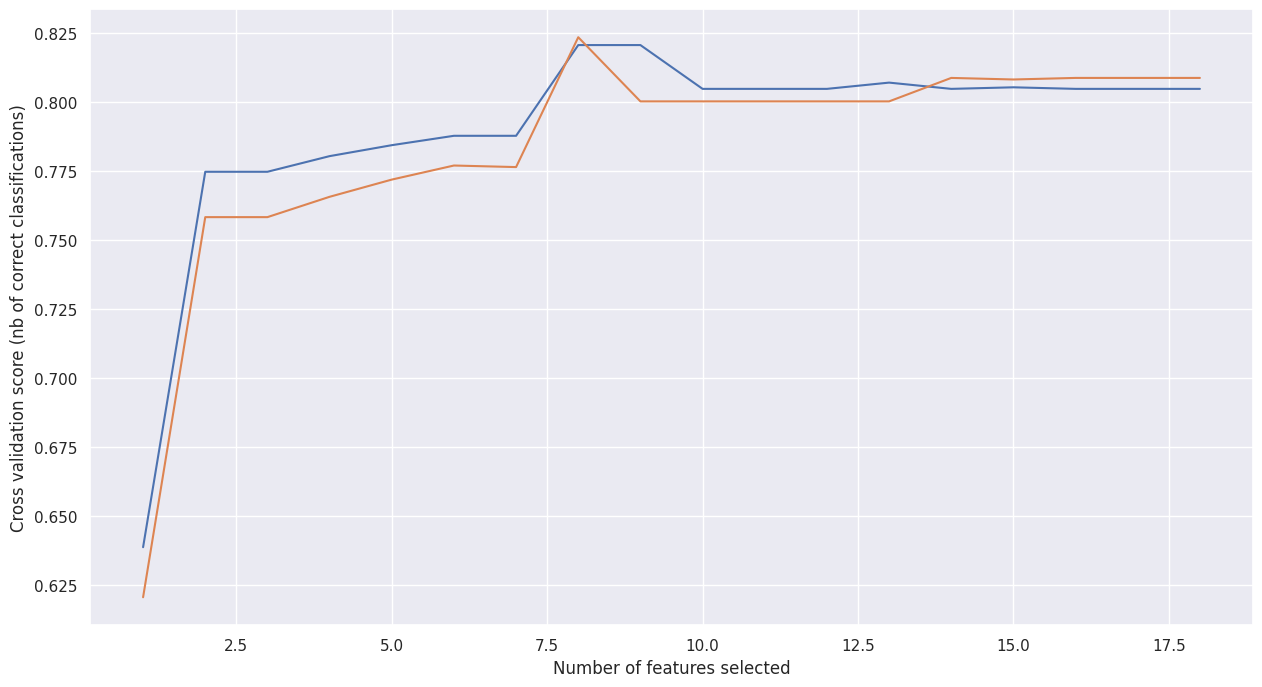

In [78]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
recall_scorer = make_scorer(recall_score, pos_label='Malware')
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=1, n_jobs=-1)
rfecv.fit(x_train_pca, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

x_train_pca = rfecv.transform(x_train_pca)
x_test_pca = rfecv.transform(x_test_pca)

In [79]:
def create_grid_search(model, params):
    # Create a grid search object which is used to find the best hyperparameters for the model
    return GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=3, cv=3, scoring='accuracy', return_train_score=True)

In [80]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):

    df = pd.DataFrame(results)
    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build colorscale
    color = np.zeros(len(df), dtype='uint8')
    colorscale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'], y=df['mean_test_score'], marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'blue'}}, unselected={'marker': {'opacity': 0.3}}), go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,line={'colorscale': colorscale, 'cmin': 0,'cmax': 1, 'color': color, 'shape': 'hspline'})])

    fig.update_layout(
        height=800, xaxis={'title': 'STD Score'},
        yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

    # Update color callback
    def update_color(trace, points, state):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)
    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

## Model choosing and fitting

In [81]:
# Random forest is an ensemble learning method that uses multiple decision trees to make predictions.
# It is a robust and flexible model that can handle high-dimensional and complex data,
# making it a good choice for API classification tasks.

rf = RandomForestClassifier()
rf_param = {
    "n_estimators": [150, 250, 750],
    "criterion": ["gini", "entropy"],
    "max_depth": [20],
    "min_samples_split": [2],
    "random_state": [43],
}
rf_gcv = create_grid_search(rf, rf_param)

In [82]:
rf_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.993, test=0.933) total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.991, test=0.940) total time=   0.5s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.991, test=0.948) total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.991, test=0.940) total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.993, test=0.933) total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.991, test=0.948) total time=   0.8s
[CV 1/3] END criterion=entropy, ma

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_split': [2],
                         'n_estimators': [150, 250, 750],
                         'random_state': [43]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [83]:
# plot_grid_search_results(rf_gcv.cv_results_)

In [84]:
print("Best parameters: ", rf_gcv.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 43}


In [85]:
clf = rf_gcv.best_estimator_

In [86]:
# Save the model
filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model.sav"
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94536   0.97191   0.95845       356
     Malware    0.97436   0.95000   0.96203       400

    accuracy                        0.96032       756
   macro avg    0.95986   0.96096   0.96024       756
weighted avg    0.96070   0.96032   0.96034       756



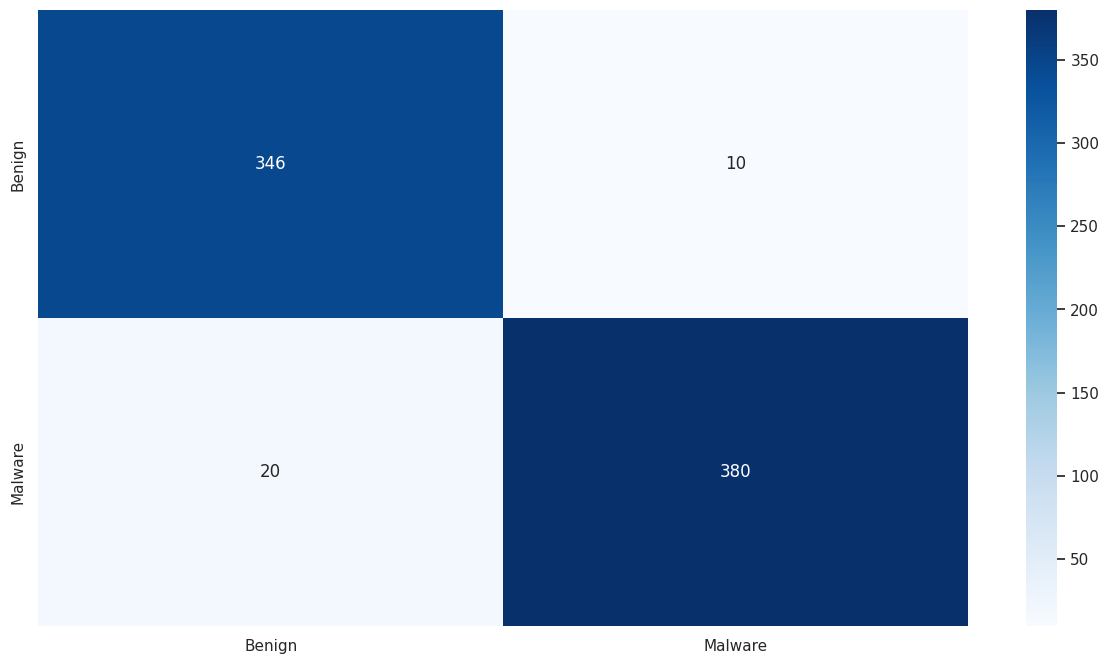

In [87]:
show(clf)

In [88]:
# Support vector machines are a popular choice for classification tasks, including API classification.
# They work by finding the hyperplane in a high-dimensional space that maximally
# separates different classes of data points.

svc = SVC(cache_size=500)
svc_param = {
    "C": [1, 2, 3],
    "kernel": ["poly", "rbf"],
    "probability": [True],
}
svc_gcv = create_grid_search(svc, svc_param)

In [89]:
svc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 3/3] END C=1, kernel=poly, probability=True;, score=(train=0.813, test=0.812) total time=   0.8s
[CV 1/3] END C=1, kernel=rbf, probability=True;, score=(train=0.868, test=0.869) total time=   0.8s
[CV 2/3] END C=1, kernel=poly, probability=True;, score=(train=0.815, test=0.823) total time=   0.8s
[CV 1/3] END C=1, kernel=poly, probability=True;, score=(train=0.815, test=0.811) total time=   0.9s
[CV 1/3] END C=2, kernel=poly, probability=True;, score=(train=0.869, test=0.869) total time=   0.6s
[CV 2/3] END C=2, kernel=poly, probability=True;, score=(train=0.872, test=0.864) total time=   0.7s
[CV 2/3] END C=1, kernel=rbf, probability=True;, score=(train=0.870, test=0.863) total time=   0.9s
[CV 3/3] END C=1, kernel=rbf, probability=True;, score=(train=0.866, test=0.871) total time=   1.1s
[CV 3/3] END C=2, kernel=poly, probability=True;, score=(train=0.867, test=0.871) total time=   0.6s
[CV 1/3] END C=2, kernel=rbf, prob

GridSearchCV(cv=3, estimator=SVC(cache_size=500), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'kernel': ['poly', 'rbf'],
                         'probability': [True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [90]:
# plot_grid_search_results(svc_gcv.cv_results_)

In [91]:
print("Best parameters: ", svc_gcv.best_params_)

Best parameters:  {'C': 3, 'kernel': 'rbf', 'probability': True}


In [92]:
svc = svc_gcv.best_estimator_

In [93]:
# Save the model
filename = "Model/"+str(dataset_number)+"/svc"+str(dataset_number)+"_model.sav"
pickle.dump(svc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94464   0.76685   0.84651       356
     Malware    0.82227   0.96000   0.88581       400

    accuracy                        0.86905       756
   macro avg    0.88345   0.86343   0.86616       756
weighted avg    0.87989   0.86905   0.86731       756



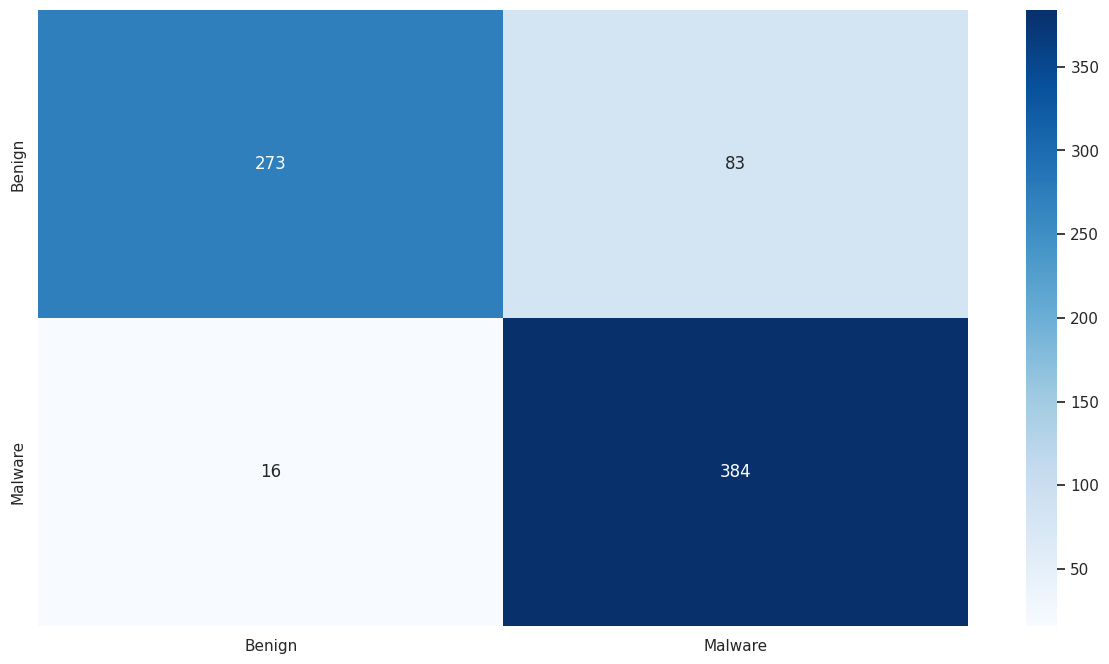

In [94]:
show(svc)

In [95]:
# Logistic regression is a simple yet effective linear model for classification tasks.
# It is particularly useful for predicting binary outcomes
# (e.g., malicious vs benign) and is often used as a baseline
# model for comparison with more complex models.

lr = LogisticRegression()
lr_param = {
    "C": [1, 2, 3],
    "penalty": ["l2"],
}
lr_gcv = create_grid_search(lr, lr_param)

In [96]:
lr_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 2/3] END C=1, penalty=l2;, score=(train=0.825, test=0.827) total time=   0.0s
[CV 1/3] END C=1, penalty=l2;, score=(train=0.826, test=0.824) total time=   0.0s
[CV 3/3] END C=1, penalty=l2;, score=(train=0.826, test=0.825) total time=   0.0s
[CV 1/3] END C=2, penalty=l2;, score=(train=0.827, test=0.824) total time=   0.0s
[CV 2/3] END C=2, penalty=l2;, score=(train=0.826, test=0.827) total time=   0.0s
[CV 1/3] END C=3, penalty=l2;, score=(train=0.827, test=0.825) total time=   0.0s
[CV 2/3] END C=3, penalty=l2;, score=(train=0.826, test=0.827) total time=   0.0s
[CV 3/3] END C=2, penalty=l2;, score=(train=0.826, test=0.825) total time=   0.0s
[CV 3/3] END C=3, penalty=l2;, score=(train=0.826, test=0.826) total time=   0.0s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l2']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [97]:
# plot_grid_search_results(lr_gcv.cv_results_)

In [98]:
print("Best parameters: ", lr_gcv.best_params_)

Best parameters:  {'C': 3, 'penalty': 'l2'}


In [99]:
lr = lr_gcv.best_estimator_

In [100]:
# Save the model
filename = "Model/"+str(dataset_number)+"/lr"+str(dataset_number)+"_model.sav"
pickle.dump(lr, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.80508   0.80056   0.80282       356
     Malware    0.82338   0.82750   0.82544       400

    accuracy                        0.81481       756
   macro avg    0.81423   0.81403   0.81413       756
weighted avg    0.81477   0.81481   0.81478       756



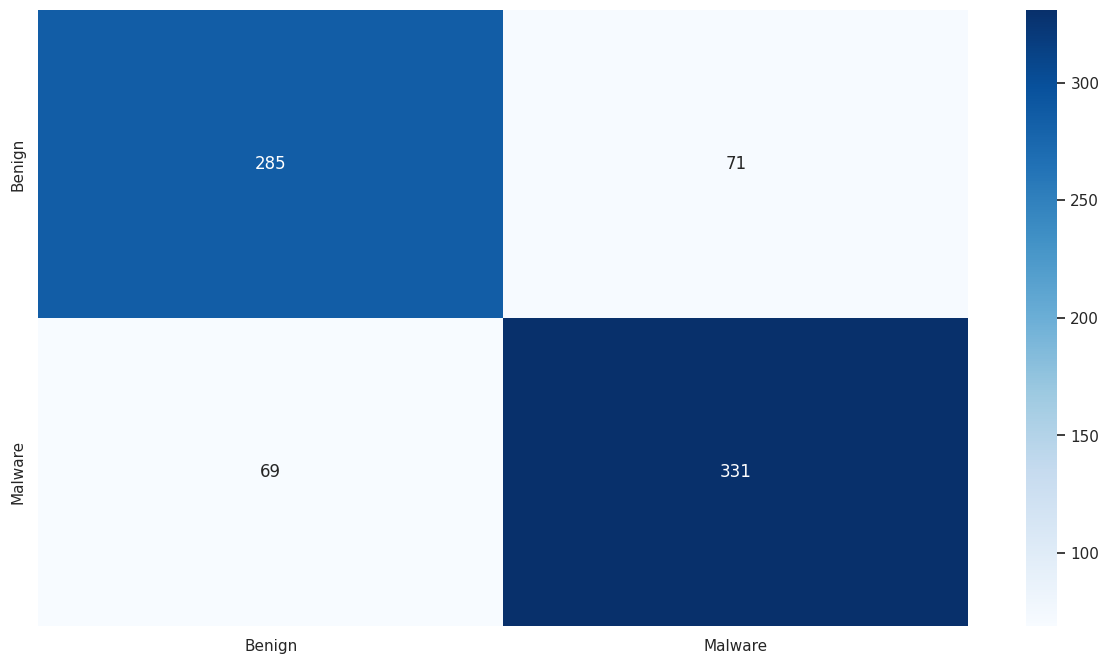

In [101]:
show(lr)

In [102]:
# KNN is a simple yet effective classification algorithm that works by finding the k nearest neighbors of a data point.
# It is a non-parametric model that does not make any assumptions about the underlying data distribution.

knn = KNeighborsClassifier()
knn_param = {
    "n_neighbors": [3 ,4, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
}
knn_gcv = create_grid_search(knn, knn_param)

In [103]:
knn_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END n_neighbors=3, weights=distance;, score=(train=0.991, test=0.946) total time=   0.1s
[CV 2/3] END n_neighbors=3, weights=distance;, score=(train=0.993, test=0.949) total time=   0.1s
[CV 1/3] END n_neighbors=3, weights=uniform;, score=(train=0.966, test=0.956) total time=   0.1s
[CV 3/3] END n_neighbors=3, weights=uniform;, score=(train=0.960, test=0.967) total time=   0.2s
[CV 2/3] END n_neighbors=3, weights=uniform;, score=(train=0.969, test=0.951) total time=   0.1s
[CV 3/3] END n_neighbors=3, weights=distance;, score=(train=0.991, test=0.960) total time=   0.1s
[CV 2/3] END n_neighbors=4, weights=distance;, score=(train=0.993, test=0.951) total time=   0.0s
[CV 1/3] END n_neighbors=4, weights=uniform;, score=(train=0.963, test=0.957) total time=   0.1s
[CV 2/3] END n_neighbors=4, weights=uniform;, score=(train=0.966, test=0.952) total time=   0.1s
[CV 3/3] END n_neighbors=4, weights=distance;, score=(train=0.

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [104]:
# plot_grid_search_results(knn_gcv.cv_results_)

In [105]:
print("Best parameters: ", knn_gcv.best_params_)

Best parameters:  {'n_neighbors': 4, 'weights': 'uniform'}


In [106]:
knn = knn_gcv.best_estimator_

In [107]:
# Save the model
filename = "Model/"+str(dataset_number)+"/knn"+str(dataset_number)+"_model.sav"
pickle.dump(knn, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94667   0.99719   0.97127       356
     Malware    0.99738   0.95000   0.97311       400

    accuracy                        0.97222       756
   macro avg    0.97202   0.97360   0.97219       756
weighted avg    0.97350   0.97222   0.97225       756



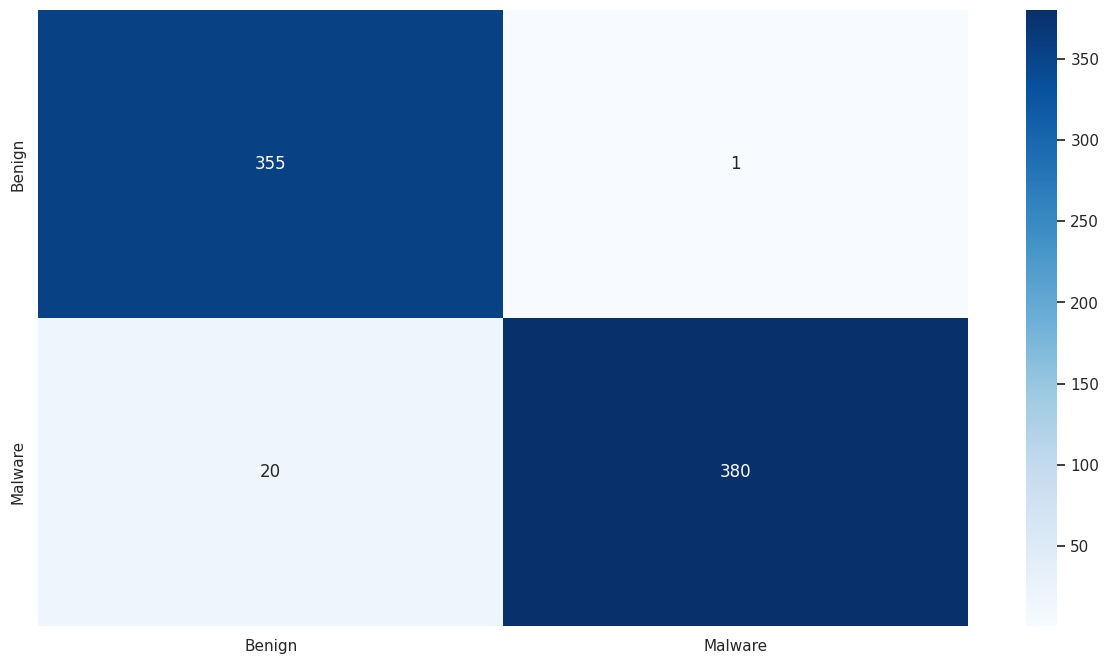

In [108]:
show(knn)

In [109]:
# Decision trees are a popular choice for classification tasks.
# They work by recursively partitioning the feature space into smaller and smaller regions,
# until each region contains only a single class of data points.

dt = DecisionTreeClassifier()
dt_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
dt_gcv = create_grid_search(dt, dt_param)

In [110]:
dt_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.861, test=0.839) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.855, test=0.857) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.852, test=0.862) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.861, test=0.839) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.852, test=0.862) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.855, test=0.857) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=4;, score=(train=0.861, test=0.841) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=4;, score=(train=0.855, test=0.857) total time=   0.0s
[CV 3/3] END crit

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [111]:
# plot_grid_search_results(dt_gcv.cv_results_)

In [112]:
print("Best parameters: ", dt_gcv.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


In [113]:
dt = dt_gcv.best_estimator_

In [114]:
# Save the model
filename = "Model/"+str(dataset_number)+"/dt"+str(dataset_number)+"_model.sav"
pickle.dump(dt, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94430   1.00000   0.97135       356
     Malware    1.00000   0.94750   0.97304       400

    accuracy                        0.97222       756
   macro avg    0.97215   0.97375   0.97220       756
weighted avg    0.97377   0.97222   0.97225       756



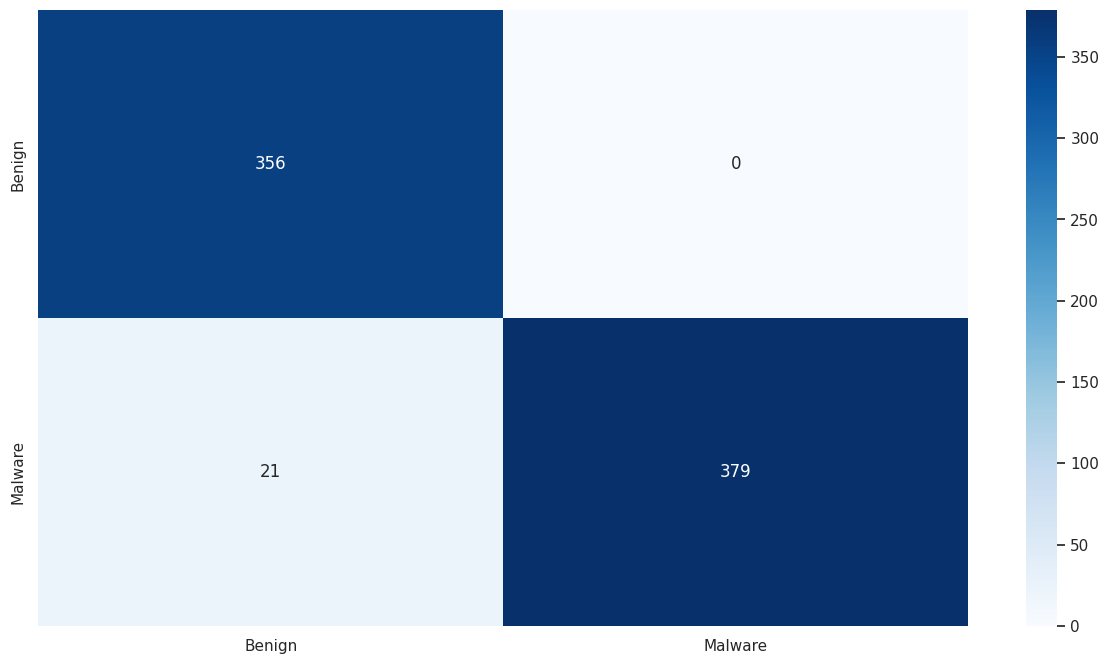

In [115]:
show(dt)

In [116]:
# AdaBoost is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

abc = AdaBoostClassifier()
abc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
abc_gcv = create_grid_search(abc, abc_param)

In [117]:
abc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.751, test=0.751) total time=   0.2s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.757, test=0.739) total time=   0.2s[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.745, test=0.764) total time=   0.2s

[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.745, test=0.764) total time=   0.4s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.751, test=0.751) total time=   0.4s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.757, test=0.739) total time=   0.4s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.745, test=0.764) total time=   0.5s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.751, test=0.751) total time=   0.6s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.757, test=0.739) total time=   0.7s
[CV 1

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 2/3] END learning_rate=100, n_estimators=450;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=450;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=500;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=500;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=500;, score=(train=0.529, test=0.529) total time=   0.0s


/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 2/3] END learning_rate=10, n_estimators=500;, score=(train=0.249, test=0.249) total time=   2.0s
[CV 3/3] END learning_rate=10, n_estimators=500;, score=(train=0.243, test=0.261) total time=   2.1s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [118]:
# plot_grid_search_results(abc_gcv.cv_results_)

In [119]:
print("Best parameters: ", abc_gcv.best_params_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 300}


In [120]:
abc = abc_gcv.best_estimator_

In [121]:
# Save the model
filename = "Model/"+str(dataset_number)+"/abc"+str(dataset_number)+"_model.sav"
pickle.dump(abc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94667   0.99719   0.97127       356
     Malware    0.99738   0.95000   0.97311       400

    accuracy                        0.97222       756
   macro avg    0.97202   0.97360   0.97219       756
weighted avg    0.97350   0.97222   0.97225       756



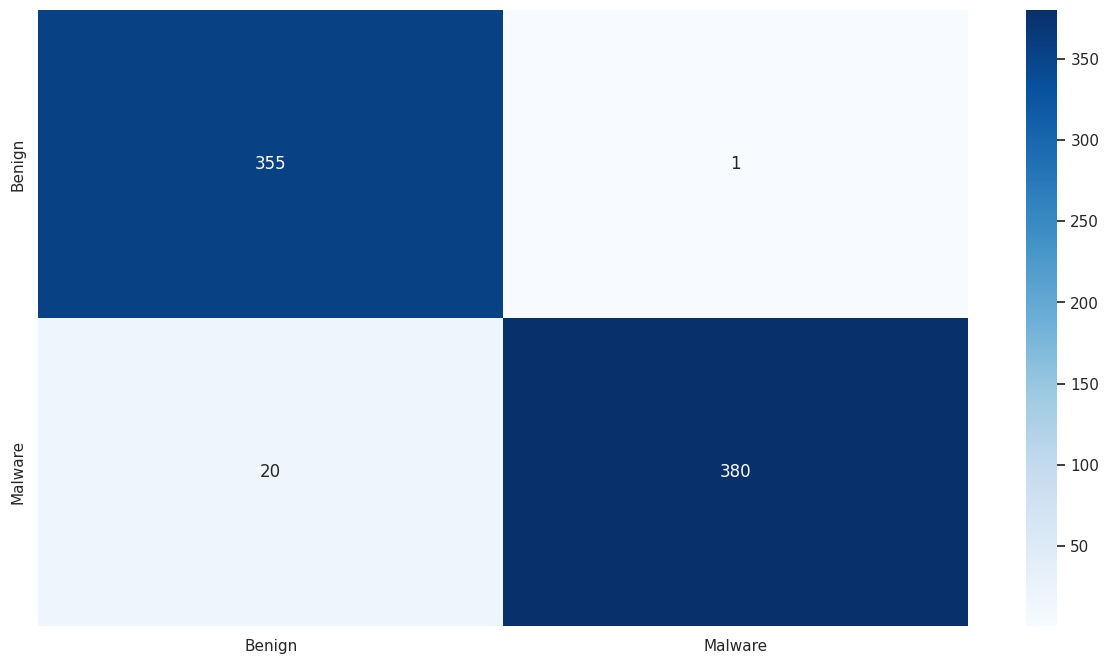

In [122]:
show(abc)

In [123]:
# Gradient Boosting is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

gbc = GradientBoostingClassifier()
gbc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
gbc_gcv = create_grid_search(gbc, gbc_param)

In [124]:
gbc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.1s
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.2s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.2s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.852, test=0.846) total time=   0.2s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.848, test=0.836) total time=   0.2s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.843, test=0.854) total time=   0.2s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.848, test=0.836) total time=   0.3s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.852, test=0.846) total time=   0.3s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.843, test=0.854) total time=   0.3s
[CV 2

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [125]:
# plot_grid_search_results(gbc_gcv.cv_results_)

In [126]:
print("Best parameters: ", gbc_gcv.best_params_)

Best parameters:  {'learning_rate': 0.01, 'n_estimators': 500}


In [127]:
gbc = gbc_gcv.best_estimator_

In [128]:
# Save the model
filename = "Model/"+str(dataset_number)+"/gbc"+str(dataset_number)+"_model.sav"
pickle.dump(gbc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94681   1.00000   0.97268       356
     Malware    1.00000   0.95000   0.97436       400

    accuracy                        0.97354       756
   macro avg    0.97340   0.97500   0.97352       756
weighted avg    0.97495   0.97354   0.97357       756



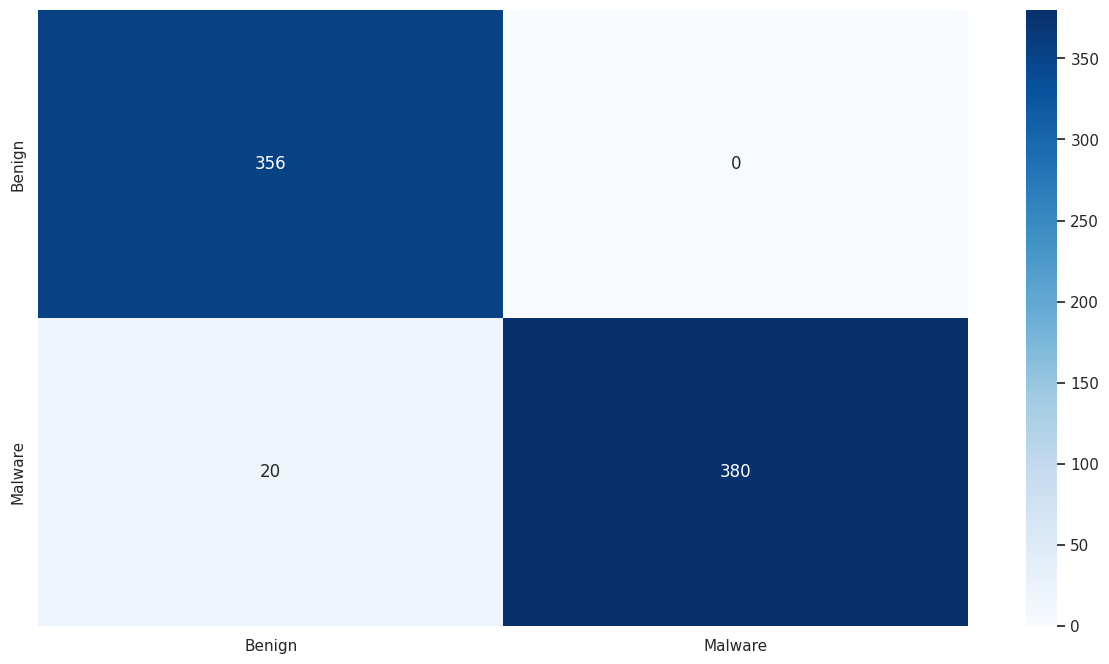

In [129]:
show(gbc)

In [130]:
# Neural networks are a popular choice for classification tasks.
# They work by learning the weights of the connections between neurons in the network.

mlp = MLPClassifier()
mlp_param = {
    "hidden_layer_sizes": [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "early_stopping": [True],
}
mlp_gcv = create_grid_search(mlp, mlp_param)

In [131]:
mlp_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 3/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, solver=adam;, score=(train=0.888, test=0.889) total time=   1.2s
[CV 1/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=invscaling, solver=adam;, score=(train=0.931, test=0.918) total time=   1.6s
[CV 2/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, solver=adam;, score=(train=0.934, test=0.922) total time=   1.7s
[CV 1/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, solver=adam;, score=(train=0.933, test=0.923) total time=   1.9s
[CV 3/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=invscaling, solver=adam;, score=(train=0.921, test=0.940) tot

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (100, 100, 100, 100),
                                                (100, 100, 100, 100, 100),
                                                (100, 100, 100, 100, 100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['adam']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [132]:
# plot_grid_search_results(mlp_gcv.cv_results_)

In [133]:
print("Best parameters: ", mlp_gcv.best_params_)

Best parameters:  {'activation': 'relu', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [134]:
mlp = mlp_gcv.best_estimator_

In [135]:
# Save the model
filename = "Model/"+str(dataset_number)+"/mlp"+str(dataset_number)+"_model.sav"
pickle.dump(mlp, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94721   0.90730   0.92683       356
     Malware    0.92048   0.95500   0.93742       400

    accuracy                        0.93254       756
   macro avg    0.93385   0.93115   0.93213       756
weighted avg    0.93307   0.93254   0.93243       756



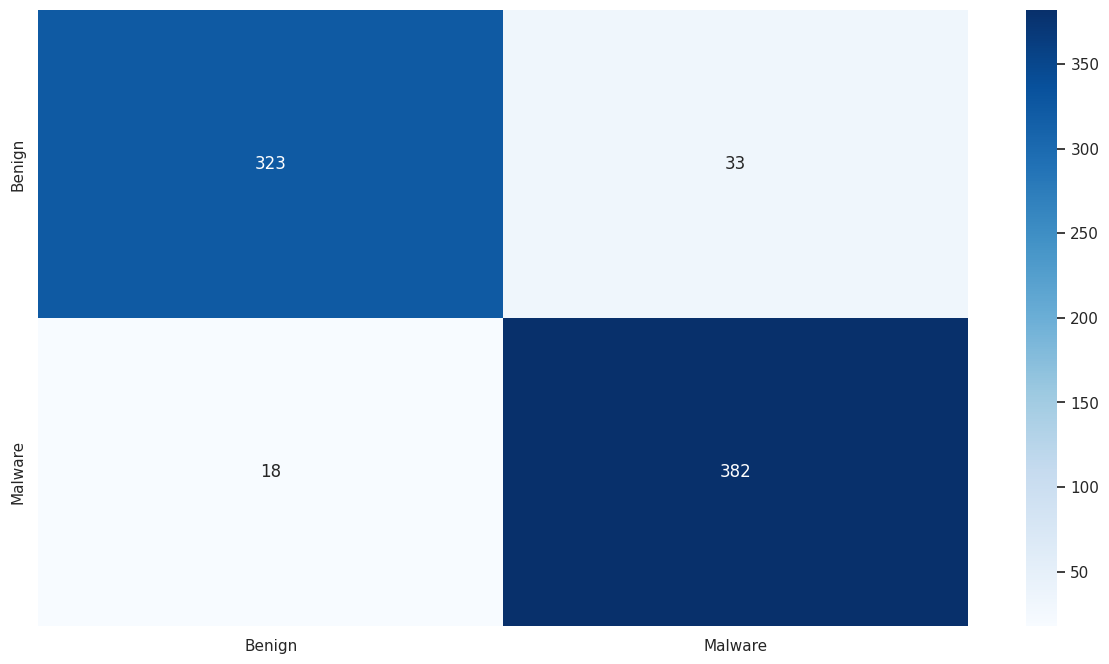

In [136]:
show(mlp)

In [137]:
# Voting classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

vc = VotingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)])
vc_param = {
    "weights": [[1,1,1,1,1,1,1,1], [2,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1], [1,1,2,1,1,1,1,1], [1,1,1,2,1,1,1,1], [1,1,1,1,2,1,1,1], [1,1,1,1,1,2,1,1], [1,1,1,1,1,1,2,1], [1,1,1,1,1,1,1,2]],
    "voting": ["hard", "soft"],
}
vc_gcv = create_grid_search(vc, vc_param)

In [138]:
vc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.969, test=0.954) total time=   5.3s
[CV 3/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.961, test=0.973) total time=   5.4s
[CV 2/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.971, test=0.957) total time=   5.4s
[CV 1/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.972, test=0.954) total time=   6.1s
[CV 3/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.967, test=0.967) total time=   4.2s
[CV 2/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.974, test=0.953) total time=   4.6s
[CV 1/3] END voting=hard, weights=[1, 2, 1, 1, 1, 1, 1, 1];, score=(train=0.971, test=0.953) total time=   5.4s
[CV 2/3] END voting=hard, weights=[1, 2, 1, 1, 1, 1, 1, 1];, score=(train=0.969, test=0.956) total time=   5.6s
[CV 3/3] END voting=hard, weights=[1, 2, 1,

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('clf',
                                                     RandomForestClassifier(criterion='entropy',
                                                                            max_depth=20,
                                                                            n_estimators=150,
                                                                            random_state=43)),
                                                    ('svc',
                                                     SVC(C=3, cache_size=500,
                                                         probability=True)),
                                                    ('lr',
                                                     LogisticRegression(C=3)),
                                                    ('knn',
                                                     KNeighborsClassifier(n_neighbors=4)),
                                                    ('dt',
                                                     DecisionTreeClassifier(max_depth=7)),
                                                    ('abc',
                                                     AdaBoostClassifier(le...
                                                                   early_stopping=True,
                                                                   hidden_layer_sizes=(100,
                                                                                       100,
                                                                                       100),
                                                                   learning_rate='invscaling'))]),
             n_jobs=-1,
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [[1, 1, 1, 1, 1, 1, 1, 1],
                                     [2, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 2, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 2, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 2, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 2, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 2, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 2, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 2]]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [139]:
# plot_grid_search_results(vc_gcv.cv_results_)

In [140]:
print("Best parameters: ", vc_gcv.best_params_)

Best parameters:  {'voting': 'hard', 'weights': [1, 1, 1, 1, 1, 2, 1, 1]}


In [141]:
vc = vc_gcv.best_estimator_

In [142]:
# Save the model
filename = "Model/"+str(dataset_number)+"/vc"+str(dataset_number)+"_model.sav"
pickle.dump(vc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94681   1.00000   0.97268       356
     Malware    1.00000   0.95000   0.97436       400

    accuracy                        0.97354       756
   macro avg    0.97340   0.97500   0.97352       756
weighted avg    0.97495   0.97354   0.97357       756



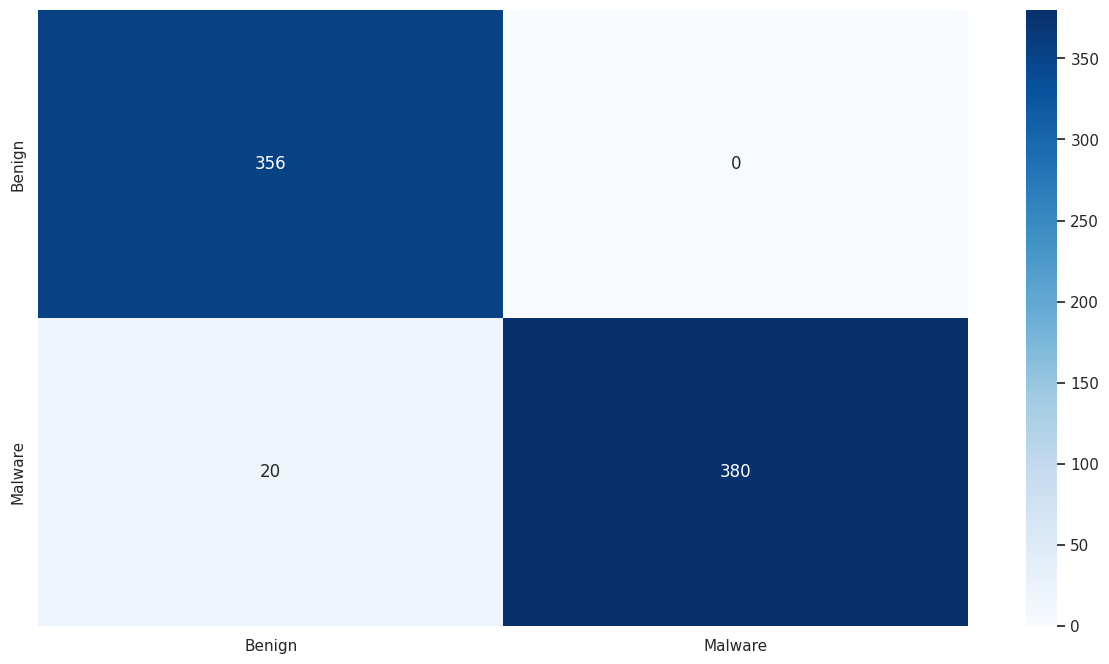

In [143]:
show(vc)

In [144]:
# Stacking classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

sc = StackingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)], final_estimator=LogisticRegression())
sc_param = {
    "final_estimator__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
sc_gcv = create_grid_search(sc, sc_param)

In [145]:
# Print size of x_train_pca
print(x_train_pca.shape)


(3526, 8)


In [146]:
sc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END final_estimator__C=0.01;, score=(train=0.969, test=0.954) total time=  23.2s
[CV 3/3] END final_estimator__C=0.001;, score=(train=0.965, test=0.971) total time=  24.4s
[CV 1/3] END final_estimator__C=0.001;, score=(train=0.971, test=0.954) total time=  24.7s
[CV 2/3] END final_estimator__C=0.001;, score=(train=0.972, test=0.956) total time=  26.1s
[CV 3/3] END final_estimator__C=0.01;, score=(train=0.962, test=0.973) total time=  26.2s
[CV 1/3] END final_estimator__C=0.1;, score=(train=0.970, test=0.954) total time=  26.6s
[CV 2/3] END final_estimator__C=0.01;, score=(train=0.971, test=0.957) total time=  29.0s
[CV 2/3] END final_estimator__C=0.1;, score=(train=0.972, test=0.957) total time=  26.1s
[CV 3/3] END final_estimator__C=0.1;, score=(train=0.962, test=0.974) total time=  27.0s
[CV 1/3] END final_estimator__C=1;, score=(train=0.970, test=0.953) total time=  30.3s
[CV 2/3] END final_estimator__C=1;, score=(

GridSearchCV(cv=3,
             estimator=StackingClassifier(estimators=[('clf',
                                                       RandomForestClassifier(criterion='entropy',
                                                                              max_depth=20,
                                                                              n_estimators=150,
                                                                              random_state=43)),
                                                      ('svc',
                                                       SVC(C=3, cache_size=500,
                                                           probability=True)),
                                                      ('lr',
                                                       LogisticRegression(C=3)),
                                                      ('knn',
                                                       KNeighborsClassifier(n_neighbors=4)),
                                                      ('dt',
                                                       DecisionTreeClassifier(max_depth=7)),
                                                      ('abc',
                                                       AdaBoostClassifier(...
                                                      ('gbc',
                                                       GradientBoostingClassifier(learning_rate=0.01,
                                                                                  n_estimators=500)),
                                                      ('mlp',
                                                       MLPClassifier(alpha=0.1,
                                                                     early_stopping=True,
                                                                     hidden_layer_sizes=(100,
                                                                                         100,
                                                                                         100),
                                                                     learning_rate='invscaling'))],
                                          final_estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'final_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [147]:
# plot_grid_search_results(sc_gcv.cv_results_)

In [148]:
print("Best parameters: ", sc_gcv.best_params_)

Best parameters:  {'final_estimator__C': 100}


In [149]:
sc = sc_gcv.best_estimator_

In [150]:
# Save the model
filename = "Model/"+str(dataset_number)+"/sc"+str(dataset_number)+"_model.sav"
pickle.dump(sc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94681   1.00000   0.97268       356
     Malware    1.00000   0.95000   0.97436       400

    accuracy                        0.97354       756
   macro avg    0.97340   0.97500   0.97352       756
weighted avg    0.97495   0.97354   0.97357       756



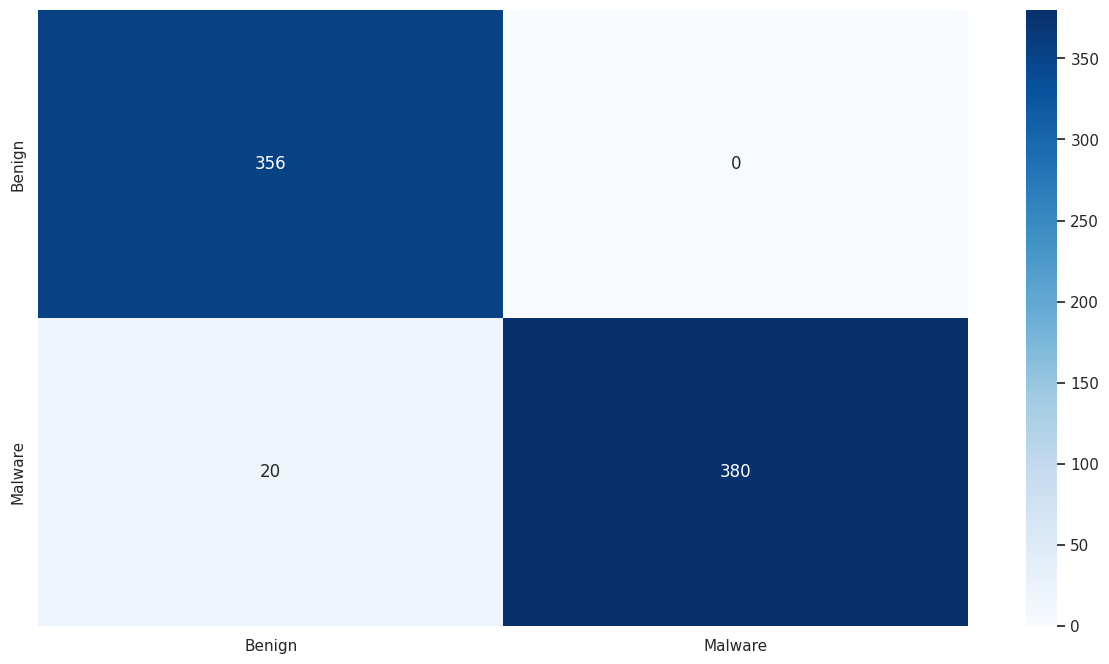

In [151]:
show(sc)

In [152]:
# Choose the best model

models = [clf,svc,lr,knn,dt,abc,gbc,mlp,vc,sc]
model_names = ["Random Forest","SVM","Logistic Regression","KNN","Decision Tree","AdaBoost","Gradient Boosting","Neural Network","Voting Classifier","Stacking Classifier"]
model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[12])

best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)
print("Best model: " + best_model_name)
print("Score: " + str(best_model_score))
model_report = classification_report(true_labels, predictions, digits=5)
print(model_report)

Best model: Gradient Boosting
Score: 0.97436
              precision    recall  f1-score   support

      Benign    0.94681   1.00000   0.97268       356
     Malware    1.00000   0.95000   0.97436       400

    accuracy                        0.97354       756
   macro avg    0.97340   0.97500   0.97352       756
weighted avg    0.97495   0.97354   0.97357       756



In [158]:
# Choose the best model by the recall

models = [clf,svc,lr,knn,dt,abc,gbc,mlp,vc,sc]
model_names = ["Random Forest","SVM","Logistic Regression","KNN","Decision Tree","AdaBoost","Gradient Boosting","Neural Network","Voting Classifier","Stacking Classifier"]
model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[17])

best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)
print("Best model: " + best_model_name)
print("Score: " + str(best_model_score))
model_report = classification_report(true_labels, predictions, digits=5)
print(model_report)

Best model: Random Forest
Score: macro
              precision    recall  f1-score   support

      Benign    0.94681   1.00000   0.97268       356
     Malware    1.00000   0.95000   0.97436       400

    accuracy                        0.97354       756
   macro avg    0.97340   0.97500   0.97352       756
weighted avg    0.97495   0.97354   0.97357       756



## Result printout

In [179]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

# Test

In [154]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in test_df.columns[test_df.isna().any()].tolist():
    test_df[column] = test_df[column].fillna('None')
    
test_df = vectorize_df(test_df)

X = test_df[features_list].to_numpy()
X = ss.transform(X)
X = rfecv.transform(X)
predictions = vc.predict(X)

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# Save your predictions

In [205]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')